# 手搓逻辑回归

In [2]:
import numpy as np

In [3]:
class logistic_regression():
	def __init__(self,C=1.0):
		self.w = 0
		self.b = 0
		self.C = C#正则化参数

	def logistic(self,z):
		return 1/(1 + np.exp((-1)*z))
	
	def predict(self,x):
		#预测，x可以是(m,n)矩阵
		return self.logistic(x@self.w + self.b)
	
	def loss(self,x,y):
		'''
		计算单例的损失\n
		x: a sample (n,)\n
		y: a label
		'''
		p = self.predict(x)
		return (-1)*y * np.log(p) - (1-y)*np.log(1-p)

	def cost(self,X,y):
		'''
		成本函数\n
		X: samples (m,n)\n
		y: labels (m,)
		'''
		losses = np.array([self.loss(X[i],y[i]) for i in range(y.shape[0])])
		return (1/y.shape[0])*losses.sum()

	def fit(self,X,y,alpha,max_iter=5000):
		'''
		x: 样本(m,n)\n
		y: 真实标签(m,)\n
		alpha: 学习率\n
		iter: 最大迭代次数
		'''

		self.w = np.zeros(X.shape[1])
		self.b = 0
		iter_cnt = 0
		costs = [self.cost(X,y)]

		for _ in range(max_iter):
			iter_cnt += 1
			c = self.w
			d = self.b

			#print('temp:',temp.shape)
			#print(x[1].shape)
			difference = np.array([self.predict(X[i]) - y[i] for i in range(y.shape[0])])
			self.w = self.w * (1-alpha*self.C/X.shape[0]) - alpha*(difference@X)
			self.b = self.b - alpha*difference.sum()

			costs.append(self.cost(X,y))

			if(np.sqrt(((c-self.w)**2).sum() + (d - self.b)**2) < 1e-8):
				break

		print(f'iter cnt: {iter_cnt}')

		return costs

测试

In [4]:
import matplotlib.pyplot as plt

(20,)
(20,)
(20,)
(20,)
(40, 2)


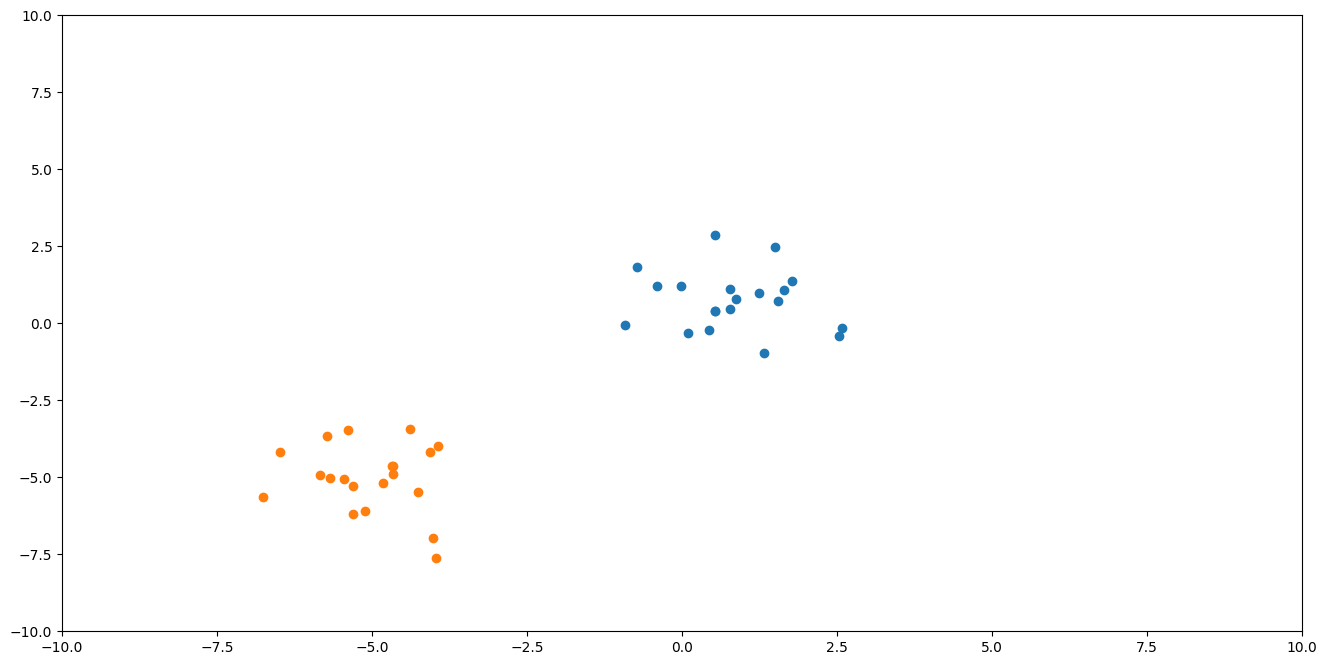

In [5]:
rng = np.random.RandomState(42)

x_1 = rng.normal(loc=1,scale=1,size=20)
print(x_1.shape)

y_1 = rng.normal(loc=1,scale=1,size=20)
print(y_1.shape)

x_2 = rng.normal(loc=-5,scale=1,size=20)
print(x_2.shape)

y_2 = rng.normal(loc=-5,scale=1,size=20)
print(y_2.shape)

X_1 = np.array([[x_1[i],y_1[i]] for i in range(x_1.shape[0])])
X_2 = np.array([[x_2[i],y_2[i]] for i in range(x_2.shape[0])])
X = np.vstack((X_1,X_2))
print(X.shape)

y = np.zeros(40)
y[21:] = 1


fig = plt.figure(figsize=(16,8))
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.scatter(x_1,y_1)
plt.scatter(x_2,y_2)
plt.show()

In [6]:
lr = logistic_regression()
costs = lr.fit(X,y,0.02,10000)
print(lr.w,lr.b)

iter cnt: 10000
[-2.16765707  0.00990065] -6.930495337430483


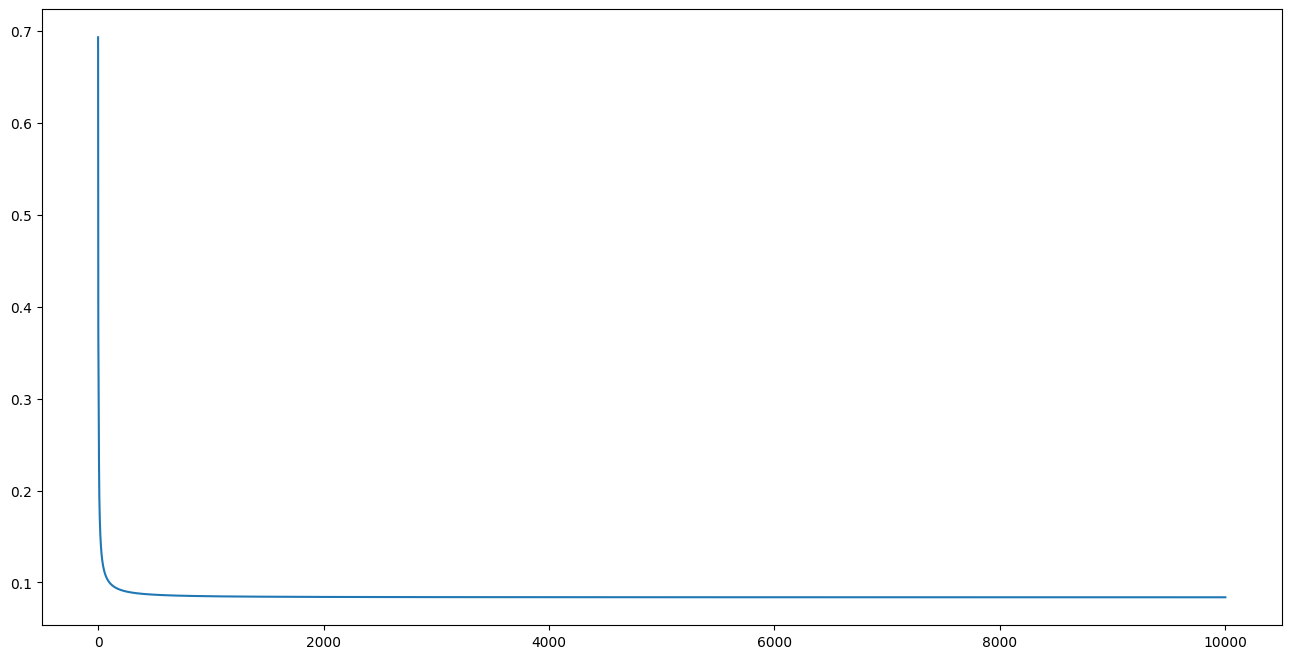

In [7]:
plt.figure(figsize=(16,8))
plt.plot(range(len(costs)),costs)
plt.show()

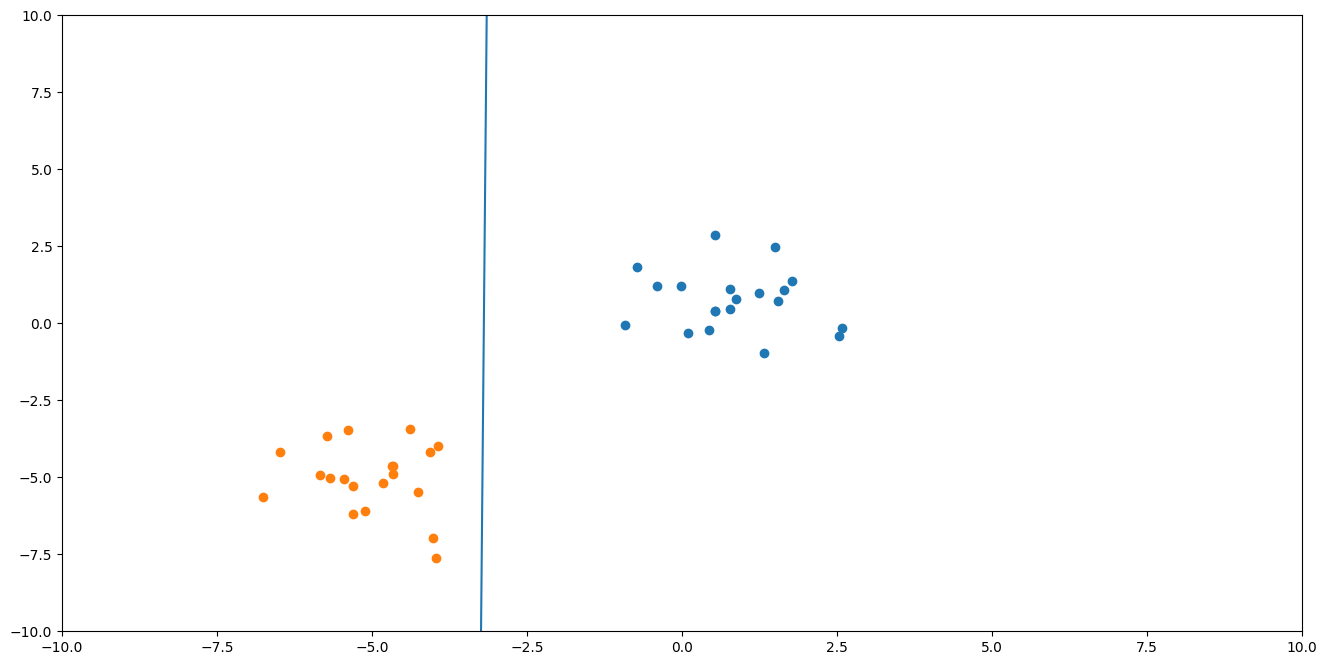

In [8]:
x = np.linspace(-10,10)
y = -1*(lr.w[0]/lr.w[1])*x-(lr.b/lr.w[1])

fig = plt.figure(figsize=(16,8))
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.scatter(x_1,y_1)
plt.scatter(x_2,y_2)
plt.plot(x,y)
plt.show()

# 对比scikit-learn库的效果

## scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [25]:
# 加载数据
X, y = load_iris(return_X_y=True)

# 只用前两类来做二分类
X, y = X[y != 2], y[y != 2]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建逻辑回归模型（C=正则化强度，越小越强）
model = LogisticRegression(solver='liblinear')

# 拟合模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算准确率
print("准确率：", accuracy_score(y_test, y_pred))


准确率： 1.0


In [14]:
print(X_train.shape)
print(y_train.shape)

(70, 4)
(70,)


In [26]:
print("权重 w:", model.coef_)
print("偏置 b:", model.intercept_)

权重 w: [[-0.35865859 -1.36186707  2.09037258  0.94442534]]
偏置 b: [-0.25079877]


## custom

In [23]:
my_model = logistic_regression(C=1)

my_model.fit(X_train, y_train,0.003)

y_pred = my_model.predict(X_test)

y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0

print("准确率：", accuracy_score(y_test, y_pred))

iter cnt: 5000
准确率： 1.0


In [27]:
print("权重 w:", my_model.w)
print("偏置 b:", my_model.b)

#为何与scikit-learn相差这么多？虽然我的准确率尚可

权重 w: [-0.75812338 -2.8077602   4.36310252  2.02115547]
偏置 b: -0.6122012380243433
